
## Escalamiento lineal
#### ¿Porque usarlo?
Modelos de machine learning eficientes en el rango [-1,1]
#### ¿Hay diferentes tipos?
max-min, clipping (Menos recomendado), Z-score, Winsorinzin, etc
#### ¿Cuando usarlos?
Data simetrica o uniformemente distribuida


## Procesamiento para variables numéricas

**La normalización es una técnica que a menudo se aplica como parte de la preparación de datos para el aprendizaje automático.** El objetivo de la normalización es cambiar los valores de las columnas numéricas en el conjunto de datos para usar una escala común, sin distorsionar las diferencias en los rangos de valores ni perder información. La normalización también es necesaria para que algunos algoritmos modelen los datos correctamente.

Ejemplo, suponga que su conjunto de datos de entrada contiene una columna con valores que van de 0 a 1 y otra columna con valores que van de 10,000 a 100,000. La gran diferencia en la escala de los números podría causar problemas al intentar combinar los valores como características durante el modelado.

### Tenemos varias opciones para transformar datos numéricos:

- Cambiar todos los valores a una escala de 0 a 1 o transformar los valores representándolos como rangos de percentiles en lugar de valores absolutos.

- Aplicar la normalización a una sola columna o a varias columnas en el mismo conjunto de datos.


## Normalización lineal

- **Zscore** : Convierte todos los valores en una puntuación z. Los valores de la columna se transforman mediante la siguiente fórmula:

### $$z_{score} = \frac {x-mean(x)} {stdev(x)}$$
- **MinMax** : El normalizador min-max cambia la escala linealmente cada característica al intervalo [0,1]. El cambio de escala al intervalo [0,1] se realiza cambiando los valores de cada característica para que el valor mínimo sea 0, y luego dividiendo por el nuevo valor máximo

### $$ z= \frac {x-min(x)}{[max(x) - min(x)]} : [0,1]$$
### $$ z= \frac {2x-min(x)-max(x)}{[max(x) - min(x)]} : [-1,1]$$

#### ¿Cuándo usar la normalización lineal?
En datos simétricos o en datos uniformemente distribuidos.

## Transformación no lineal
#### ¿Por qué usarlos?
En el caso donde haya datos fuertemente sesgados y no simétricos.
#### Algunos tipos
Logaritmos, sigmoides, polinomiales, etc
- **Logística:** los valores de la columna se transforman mediante la siguiente fórmula:
#### $z = \frac{1}{1 + exp(-x)}$
- **TanH:** todos los valores se convierten a una tangente hiperbólica. Los valores de la columna se transforman mediante la siguiente fórmula:

#### Cuando usarlo?
¡Antes de escalamientos lineales!

# Escalamiento de datos numéricos

### Transformaciones lineales

In [4]:
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]
print(raw)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

Detalles del dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

max_raw: [0.17055523], min_raw: [-0.0902753]



Text(0.5, 1.0, 'z-scaled')

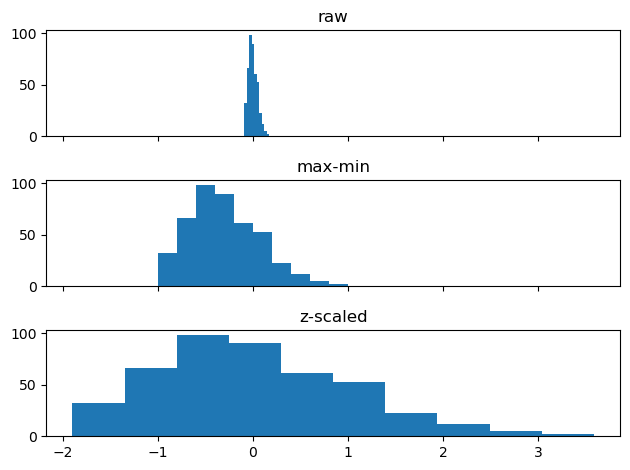

In [23]:
# escalamiento max-min
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw -min_raw)/(max_raw - min_raw)
print(f"max_raw: {max_raw}, min_raw: {min_raw}\n")
# normalización Z-score
avg = np.average(raw)
std = np.std(raw)
z_scaled = (raw - avg)/std

fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True)

axs[0].hist(raw)
axs[0].set_title('raw')
axs[1].hist(scaled)
axs[1].set_title('max-min')
axs[2].hist(z_scaled)
axs[2].set_title('z-scaled')

In [24]:
# modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

In [25]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number = 100)
z_scaled_time = timeit.timeit(train_z_scaled, number = 100)
print('trainning time for raw data : {} '.format(raw_time))
print('trainning time for scaled data : {}'.format(scaled_time))
print('trainning time for z_scaled data : {}'.format(z_scaled_time))

trainning time for raw data : 0.080538899999965 
trainning time for scaled data : 0.040490500000032625
trainning time for z_scaled data : 0.03816329999995105


* max-min scaling: mejor para datos uniformemente distribuidos
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

Utilidades de Scikit Learn : https://scikit-learn.org/stable/modules/preprocessing.html

### Transformaciones no lineales

In [5]:
df = pd.read_csv('cars.csv')

<AxesSubplot:ylabel='Density'>

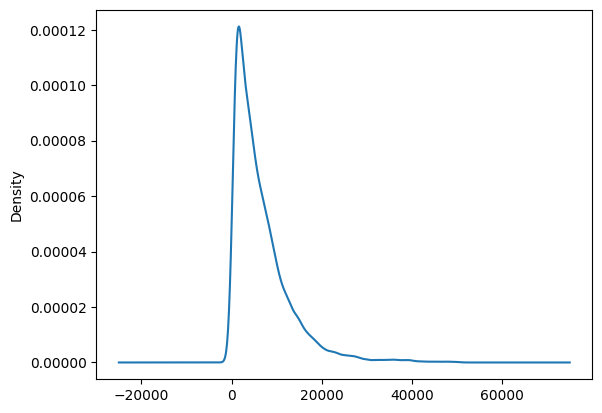

In [24]:
#df.price_usd.hist()
df.price_usd.plot.kde()

Transformación con $$tanh(x)$$

<AxesSubplot:ylabel='Density'>

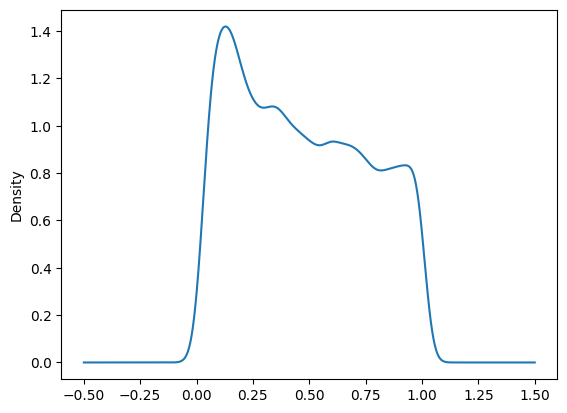

In [25]:
p = 10000
#df.price_usd.apply(lambda x: np.tanh(x/p)).hist()
df.price_usd.apply(lambda x: np.tanh(x/p)).plot.kde()

* mapear datos a una distribucion gaussiana: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=86e57948-5826-4e82-b8a9-8d73035014be' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

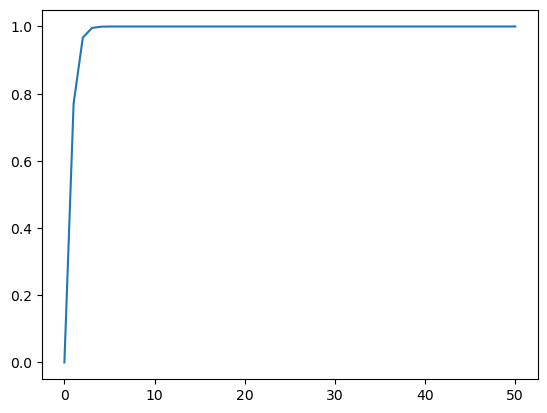

In [20]:
import matplotlib.pyplot as plt
x_val = np.linspace(0,50)
f = (lambda x: np.tanh(x))
y_val = f(x_val)

plt.plot(x_val, y_val)